In [7]:
#for showinh the graphe 
%matplotlib inline


In [8]:
#importing
from matplotlib import pyplot as plt
import numpy as np

In [11]:
#each flower (length , width , color (b=0,r=1))
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

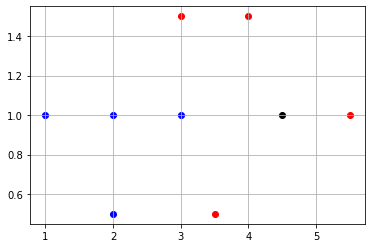

In [51]:
#Diagram showing all flowers 
def Flowers_Diagram():
    plt.grid()
    
    for i in range(len(data)):
        color = 'r'
        if data[i][2] == 0:
            color = 'b'
        plt.scatter( data[i][0] , data[i][1] , c=color)
    plt.scatter( mystery_flower[0] , mystery_flower[1] , c="black")  
    
Flowers_Diagram()    
    

In [13]:
# network

#       o  flower type
#      / \  w1, w2, b
#     o   o  length, width

In [14]:
#sigmood Function

def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsigmoid_dx(x):
    return sigmoid(x) * ( 1 - sigmoid(x))

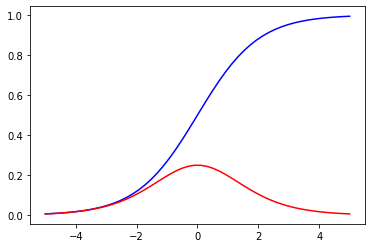

In [38]:
#Diagram sigmoid && dsigmoid_dx functions

X = np.linspace(-5, 5,50)  # [-5 , 5 ] ---> draw 50 point

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
plt.plot(X, dsigmoid_dx(X), c="r") # sigmoid_p in red

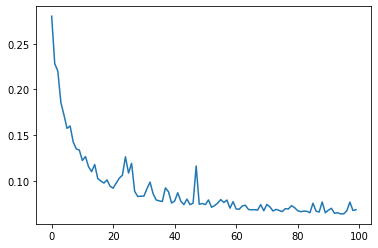

In [66]:
#train 
def train():
    #random weights & bias
    w1 = np.random.randn() 
    w2 = np.random.randn() 
    b  = np.random.randn() 
    
    iterations = 10000
    learn_rate = 0.1
    costs = []
    
    for i in range(iterations) :
        
        #pick a random flower from our data 
        index = np.random.randint(len(data)) 
        point = data[index]
        target = point[2]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z)
        
        cost = (pred - target) ** 2
        
        # print the cost avrage over all data points every 100 iters
        if i % 100 == 0:                                           #
            c = 0                                                  #
            for j in range(len(data)):                             #
                p = data[j]                                        #
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)        #
                c = c + (p_pred - p[2]) ** 2                       #
            c = c / len(data)                                      #
            costs.append(c)                                        #
        ############################################################    
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz    = dsigmoid_dx(z) 
        
        dz_dw1      = point[0]
        dz_dw2      = point[1]
        dz_db       = 1
        
        dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1 
        dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2
        dcost_db = dcost_dpred * dpred_dz * dz_db
        
        w1 = w1 - learn_rate * dcost_dw1
        w2 = w2 - learn_rate * dcost_dw2
        b  = b  - learn_rate * dcost_db
        
        
    return costs , w1 , w2 , b

costs, w1, w2, b = train()

fig = plt.plot(costs)

In [67]:
#answer the qustion : is the mestry flower with length = 4.5 & width = 1 --> blue or red ? 

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.983701287571872
close to 0 -> blue, close to 1 -> red


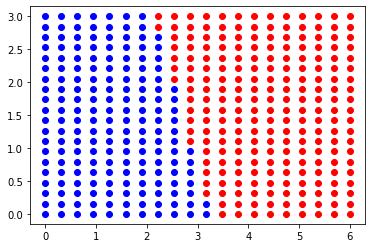

In [70]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c)